In [1]:
#For sklearn error
#!pip install scikit-learn
#For pandas error
#!pip install pandas
#For cv2 error
#!pip install opencv-python
#For PIL error
#!pip install PIL
#for keras error
#!pip install keras
#for tensorflow error
#!pip install tensorflow

In [2]:
import keras
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import re

def list_pictures(directory, ext='jpg|jpeg|bmp|png|ppm'):
    return [os.path.join(root, f)
            for root, _, files in os.walk(directory) for f in files
            if re.match(r'([\w]+.(?:' + ext + '))', f.lower())]

In [3]:
#Number of recognition class
classNumber = 2

# 入力値を画像ではなくマトリックスにする

In [4]:
#Import training data

X = []
Y = []
I = []
dataNum = []

for i in range(classNumber):
    filepath = './spectrogram_2/class' + str(i+1) + '/'
    dataNum.append(0)
    # for picture in list_pictures(filepath):
        # origimg = load_img(picture, target_size=(40,100))
        # I.append(origimg)
        # i_dif_flux_matrix = pd.read_csv('out.csv',sep=',', header = None)
        # X.append(i_dif_flux_matrix)
        # Y.append(i)
        # dataNum[i] += 1
     # 指定したフォルダ内のすべてのCSVファイルを取得
    for filename in os.listdir(filepath):
        if filename.endswith('.csv'):
            fullpath = os.path.join(filepath, filename)
            i_dif_flux_matrix = pd.read_csv(fullpath, sep=',', header=None)
            X.append(i_dif_flux_matrix.values)  # データフレームをNumPy配列に変換
            Y.append(i)
            dataNum[i] += 1

# i_dif_flux_matrix = pd.read_csv('out.csv',sep=',', header = None)
# print(type(userdicdf))

# arrayに変換
X = np.asarray(X)
print(X)
Y = np.asarray(Y)
print(Y)
print(X.shape)
# for i in range(classNumber):
    # print(dataNum[i])

[[[3.00751880e+00 1.50375940e+00 4.51127820e+00 ... 1.50375940e+00
   9.02255639e+00 0.00000000e+00]
  [0.00000000e+00 4.70035253e+00 4.70035253e+00 ... 1.17508813e+01
   2.35017626e+00 0.00000000e+00]
  [3.68324125e+00 1.10497238e+01 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 3.68324125e+00]
  ...
  [0.00000000e+00 1.27388535e+03 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.05369128e+03
   5.36912752e+03 0.00000000e+00]
  [1.01522843e+04 5.07614213e+03 5.07614213e+03 ... 0.00000000e+00
   5.07614213e+03 0.00000000e+00]]

 [[1.50375940e+00 3.00751880e+00 3.00751880e+00 ... 0.00000000e+00
   1.50375940e+00 3.00751880e+00]
  [0.00000000e+00 0.00000000e+00 4.70035253e+00 ... 4.70035253e+00
   4.70035253e+00 4.70035253e+00]
  [3.68324125e+00 0.00000000e+00 0.00000000e+00 ... 7.36648250e+00
   1.47329650e+01 0.00000000e+00]
  ...
  [1.27388535e+03 1.27388535e+03 1.27388535e+03 ... 1.27388535e+03
   3.82165

In [7]:
# Transform pixel value from 0 to 1

# X = X.astype('float32')
# X = X / 255.0

# Categorical class
Y = utils.to_categorical(Y, classNumber)
Y

array([[1., 0.],
       [0., 1.]])

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, Activation, Flatten, Dense
from keras.optimizers import Adam


# Y の形状を (サンプル数, クラス数) に変更します
# ここではバイナリ分類なので、クラス数は2と仮定します
# Y = np.array([[0, 1], [1, 0]], dtype=np.float32)  # (2, 2) に変換

# X と Y の形状を確認
print("X shape:", X.shape)
print("Y shape:", Y.shape)

# モデルの定義
model = Sequential()

# Conv1D層を追加
input_shape = X.shape[1:]  # X.shapeは (サンプル数, 幅, チャンネル数) になっているはずです。
model.add(Conv1D(32, 3, padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv1D(32, 3))
model.add(Activation('relu'))

# 全結合層に接続するためにデータをフラット化
model.add(Flatten())

# 出力層
model.add(Dense(2, activation='softmax'))  # クラス数を2に設定

# モデルのコンパイル
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# モデルのサマリーを表示
model.summary()

# モデルのトレーニング
history = model.fit(X, Y, batch_size=1, epochs=50)


X shape: (2, 19, 60)
Y shape: (2, 2)


/Users/masunohayato/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 19, 32)         │         5,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 544)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         1,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,986 (39.01 KB)

 Trainable params: 9,986 (39.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3333 - loss: 1838.7477      
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6667 - loss: 153.4372  
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6667 - loss: 11.0604   
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

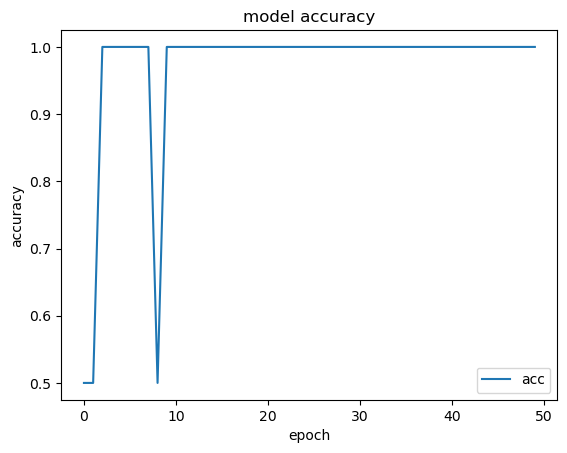

In [9]:
# Learning process 

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

In [10]:
# Confusion matrix

# Classify training data
predict_classes = np.argmax(model.predict(X), axis=-1)

mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(Y, axis=1)})
print(predict_classes)
print(np.argmax(Y, axis=1))
# Show confusion matrix
pd.crosstab(mg_df['class'], mg_df['predict'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[0 1]
[0 1]


predict,0,1
class,,
0,1,0
1,0,1


In [11]:
# Classification result for each training data

predict_classes

array([0, 1])

In [87]:
# Import test data

testX = []
testY = []
testI = []
testdataNum = []

for i in range(classNumber):
    filepath = './spectrogram_2/test' + str(i+1) + '/'
    testdataNum.append(0)
    for filename in os.listdir(filepath):
        if filename.endswith('.csv'):
            fullpath = os.path.join(filepath, filename)
            i_dif_flux_matrix = pd.read_csv(fullpath, sep=',', header=None)
            testX.append(i_dif_flux_matrix.values)  # データフレームをNumPy配列に変換
            testY.append(i)
            dataNum[i] += 1

# i_dif_flux_matrix = pd.read_csv('out.csv',sep=',', header = None)
# print(type(userdicdf))

# arrayに変換
testX = np.asarray(testX)
print(testX)
testY = np.asarray(testY)
print(testY)
print(testX.shape)
# for i in range(classNumber):
    # print(dataNum[i])





[[[3.00751880e+00 1.50375940e+00 4.51127820e+00 ... 1.50375940e+00
   9.02255639e+00 0.00000000e+00]
  [0.00000000e+00 4.70035253e+00 4.70035253e+00 ... 1.17508813e+01
   2.35017626e+00 0.00000000e+00]
  [3.68324125e+00 1.10497238e+01 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 3.68324125e+00]
  ...
  [0.00000000e+00 1.27388535e+03 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.05369128e+03
   5.36912752e+03 0.00000000e+00]
  [1.01522843e+04 5.07614213e+03 5.07614213e+03 ... 0.00000000e+00
   5.07614213e+03 0.00000000e+00]]

 [[1.50375940e+00 3.00751880e+00 3.00751880e+00 ... 0.00000000e+00
   1.50375940e+00 3.00751880e+00]
  [0.00000000e+00 0.00000000e+00 4.70035253e+00 ... 4.70035253e+00
   4.70035253e+00 4.70035253e+00]
  [3.68324125e+00 0.00000000e+00 0.00000000e+00 ... 7.36648250e+00
   1.47329650e+01 0.00000000e+00]
  ...
  [1.27388535e+03 1.27388535e+03 1.27388535e+03 ... 1.27388535e+03
   3.82165

In [88]:
testY = utils.to_categorical(testY, classNumber)



In [89]:
# Confusion matrix

# Classify test data
test_predict_classes = np.argmax(model.predict(testX), axis=-1)

mg_df = pd.DataFrame({'predict': test_predict_classes, 'class': np.argmax(testY, axis=1)})

# Show confusion matrix
pd.crosstab(mg_df['class'], mg_df['predict'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


predict,0,1
class,,
0,1,0
1,0,1


In [90]:
# Classification result for each test data

test_predict_classes

array([0, 1])

In [76]:
# Export the training result

model.save('cnn.h5')

In [9]:
# Network setup

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Remove comments when low accuracy
'''
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(classNumber))       # Number of class
model.add(Activation('softmax'))

# Compile
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])


/Users/masunohayato/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 19, 86398)